# 예측 애널리틱스
- 선형회귀 실습

## 모듈 불러오기

In [23]:
# 실습데이터
from sklearn.datasets import load_boston
#데이터 전처리
import numpy as np
import pandas as pd
#기계학습 모델 구축 및 평가
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm  
import statsmodels.formula.api as ols # 선형 회귀에서 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트
plt.rc('font', family='batang')

## 데이터 불러오기

In [27]:
type(boston)
# Bunch : 파이썬의 딕셔너리와 유사함. keys()를 통해 속성들의 명을 뽑을 수 있음.

sklearn.utils.Bunch

In [2]:
# 관측값이 많을 때 시각화를 하기도 힘들고 살펴보기도 힘든 점이 많음
boston = load_boston()
print(boston.DESCR) #키값을 담음

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
# 데이터 확인
# 패키지 제공이 아닌, 새롭게 로드 하는 경우 (pd.read_csv('파일명'))
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
# 데이터 y값 확인( 단위 1000불)
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [5]:
# 데이터 변수명 확인
# 패키지 제공이 아닌, 새롭게 로드해서 사용하는 데이터의 경우
# boston.columns (csv파일은 df로 되어있어서)
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
# 데이터 규격확인
# 패키지 제공이 아닌 새롭게 로드해서 사용하는 데이터
boston.data.shape

(506, 13)

## 데이터 전처리
- X: 독립변수, 예측변수, 입력변수, 설명변수
- y: 종속변수, 반응변수, 출력변수(타깃)

In [11]:
# 데이터 프레임형태로 변환
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns =['MEDV']) # 타깃으로 집값

In [12]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### MinMaxScaler

In [15]:
# 세트 분리전 전처리 해주는것이 좋다
from sklearn.preprocessing import MinMaxScaler
# 객체 생성 및 학습 (스케일링은 비지도라 파라미터가 한개)
minmax_scale = MinMaxScaler(feature_range=(0,5)).fit(boston.data)
# feature_range 생략시 0~1 사이범위로 정규화,, 정규화는 0~5 사이값으로
boston_data_scaled = minmax_scale.transform(boston.data)

boston_data_scaled[:3]

array([[0.00000000e+00, 9.00000000e-01, 3.39076246e-01, 0.00000000e+00,
        1.57407407e+00, 2.88752635e+00, 3.20803296e+00, 1.34601570e+00,
        0.00000000e+00, 1.04007634e+00, 1.43617021e+00, 5.00000000e+00,
        4.48399558e-01],
       [1.17961270e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 2.73998850e+00, 3.91349125e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 5.00000000e+00,
        1.02235099e+00],
       [1.17848872e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 3.47192949e+00, 2.99691040e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 4.94868627e+00,
        3.17328918e-01]])

### train set/ test set 나누기
- 일반화를 위해

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=2021) # test size 기본값이 25%, 20%로 조정

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

## 선형회귀 모델 구축하기
- 기울기, 절편, 상관계수등을 한눈에 보기 쉬움. (sklearn이 아니라 훈련방식이 다름) 
- statsmodels의 OLS를 사용하여 선형회귀분석 시행(OLS: Ordinary, Least, Squares)
 - OLS: 가장 기본적인 결정론적 선형 회귀 방법으로 잔차제곱합(RSS: Residual Sum of Squares)를 최소화 하는 가중치를 구하는 방법
 - 모델선언 : model = sm.OLS(ydata타겟, Xdata트레인)
 - 모델학습 : model_trained= model.fit()
### 선형회귀 모델 가정 확인하기
 - linearity(선형성): 종속변수는 설명변수의 선형 함수이다.
 - independence(독립성): 종속변수는 관찰값에 조건부로 독립이다.
 - Normality(정규성): 오차의 분포는 정규분포이다.
 - Equal Varanice(등분산성): 오차의 분산은 등분산이다.
  - 이 4가지 전제를 만족해야 함. 만족하지 못하면, 데이터의 정확성이 다름?

In [20]:
X_train = sm.add_constant(X_train) # 선형 회귀 식의 베타값 = 0을 만드는 가정
model = sm.OLS(y_train, X_train, axis = 1) # OLS data modeling
model_trained = model.fit() # fitting

C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### 확률 오차의 정규성 확인

C:\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


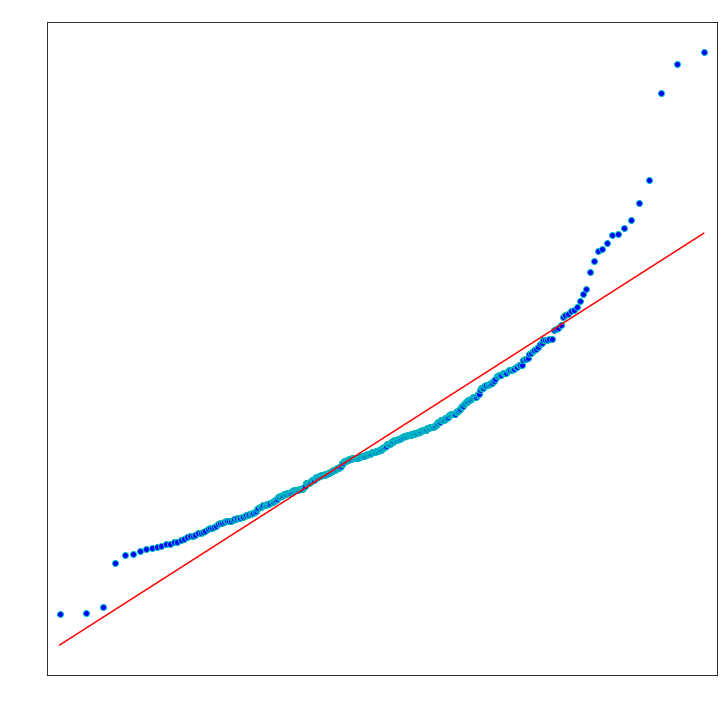

In [30]:
model_residuals = model_trained.resid # 모델의 잔차(에측값-타겟값)

#mpl.rcParams['axes.unicod_minus'] = False #음수 폰트 꺠짐 방지
fig, ax = plt.subplots(1,1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line ='s', color='c', ax = ax)
ax.title.set_text('QQ_plot')

## 데이터가 정규성을 따르고 있군

#

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Fitted values'), Text(0, 0.5, 'Residuals')]

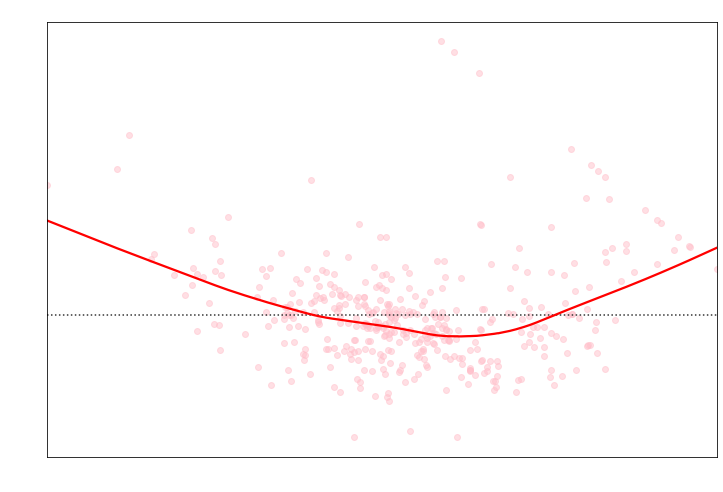

In [38]:
#####
model_fitted_y = model_trained.fittedvalues

fig, ax = plt.subplots(1,1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data = X_train, lowess = True, color = 'pink',
              scatter_kws = {'alpha' : 0.5}, line_kws = {'color' : 'red'}, ax = ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel = 'Fitted values', ylabel = 'Residuals')

In [33]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     93.01
Date:                Thu, 03 Nov 2022   Prob (F-statistic):          1.02e-110
Time:                        11:04:59   Log-Likelihood:                -1196.3
No. Observations:                 404   AIC:                             2421.
Df Residuals:                     390   BIC:                             2477.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0744      5.844      6.002      0.0

In [36]:
# 상관성이 낮은속성들을 제거후 다시 요약보고서를 해줌. 보통 여기까지...
model = sm.OLS(y_train, X_train.drop(['INDUS', 'AGE'], axis = 1))
model_trained = model.fit()
print(model_trained.summary())
## --> 성능에는 큰 변화가 없지만 전 결과보다 통계적으로 유의미하다고 볼 수 있다.

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     110.3
Date:                Thu, 03 Nov 2022   Prob (F-statistic):          1.19e-112
Time:                        11:06:46   Log-Likelihood:                -1196.5
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     392   BIC:                             2465.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6295      5.783      5.988      0.0

## 예측: 미래의 반응변수 값 예측하기
- 위의 과정을 토대로 설명을 했다면 이제 예측을 해야한다.
- 학습에 사용된 값이 들어왔을 때 예측이 되는지 확인을 한다.

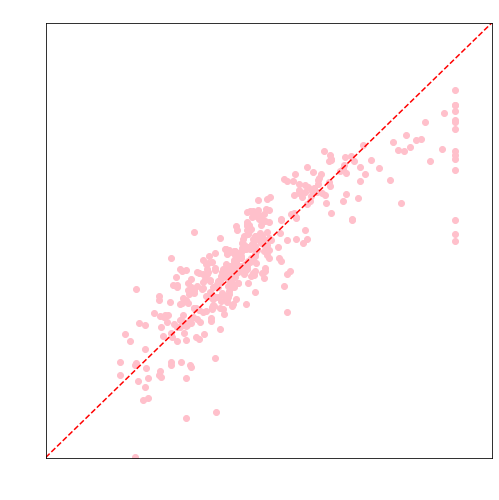

In [39]:
y_train_pred = model_trained.fittedvalues

plt.figure(figsize = (8,8))
plt.title('실제값 vs 모델 출력값')
plt.scatter(y_train, y_train_pred, color = 'pink')
plt.plot([-5,55], [-5,55], ls ='--', c='red')
plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력 값', size=16)
plt.xlim(-5,55)
plt.ylim(-5,55)

plt.show()

- 점선을 따라야 올바른 예측이 된다고 해석할 수 있다. 위의 그래프를 보면 어느 정도 유사한 패턴으로 예측함을 알 수 있다고 볼 수 있다.

In [40]:
# test셋에 대한 예측값
X_test = sm.add_constant(X_test)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
y_test_pred = model_trained.predict(X_test)